<h1>IBM HR Analytics - Employee Attrition & Performance</h1>
<p>Thank you to Kaggle user pavansubhash for contributing <a href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data"> this dataset</a> to experiment with. This is presented as just a topic exploration and skill-building, so all code is visible - this is not in a condensed "Final Presentation" format nor is it fully exhaustive.</p>

<h2>The Data in Question</h2>
<p>This fictional dataset, created by IBM data scientists, represents employee data from one business including numerous data points regarding the employees and. The goal is to analyze this data and gain insight into patterns and factors that affect employee performance within and attrition from the business.</p>

<h3>The data file includes:</h3>
<p>See <a href='#Appendix'>Appendix</a> for information on codified data.</p>
<p>This is not an exhuastive list and I will pare down the available data to make this project more concise and readable.</p>
<li><code>Age</code> - The employee's age at time of data collection. - integer</li>
<li><code>Attrition</code> - Whether this employee left or stayed employed - string, "Yes" or "No"</li>
<li><code>BusinessTravel</code> - A category representing how often an employee travels for work - string</li>
<li><code>Department</code> - The company's internal department that an employee works in - string</li>
<li><code>DistanceFromHome</code> - The employee's daily commute one-way, in miles- integer</li>
<li><code>Education</code> - A codified representation of an employee's highest attained education - int</li>
<li><code>EducationField</code> - The employee's general studied field - string</li>
<li><code>EmployeeNumber</code> - A unique identifier for the employee - int</li>
<li><code>EnvironmentSatisfaction</code>- A codified representation of the employee's satisfaction with their work environment from an assessment - int</li>
<li><code>Gender</code> - The employee's gender - string</li>
<li><code>HourlyRate</code> - The employee's hourly wage in dollars - int</li>
<li><code>JobLevel</code> - A codified representation of the employee's rank in the organization - int</li>
<li><code>JobRole</code> - The employee's title - string</li>
<li><code>JobSatisfaction</code> - A codified representation of the employee's satisfaction from an assessment - int</li>
<li><code>MaritalStatus</code> - The employee's marital status - string</li>
<li><code>MonthlyIncome</code> - The employee's monthly income - int</li>
<li><code>NumCompaniesWorked</code> - The number of companies the employee has worked at previously - int</li>
<li><code>Over18</code> - A flag showing the employee's age over 18 years - string, "Yes" or "No"</li>
<li><code>OverTime</code> - A flag showing the employee's eligibility for overtime pay - string, "Yes" or "No"</li>
<li><code>PerformanceRating</code> - A codified representation of the employee's assessed work performance - int</li>
<li><code>RelationshipSatisfaction</code> - A codified representation of the employee's satisfaction of their personal relationship - int</li>
<li><code>StockOptionLevel</code> - Unknown - int</li>
<li><code>TotalWorkingYears</code> - The employee's accumulated years of experience at any employer - int</li>
<li><code>TrainingTimesLastYear</code> - The number of trainings this employee completed in the last year - int</li>
<li><code>WorkLifeBalance</code> - A codified representation of the employee's work-life balance from an assessment - int</li>
<li><code>YearsAtCompany</code> - The employee's accumulated years of experience at this employer - int</li>
<li><code>YearsInCurrentRole</code> - The employee's accumulated years worked in their current role - int</li>
<li><code>YearsSinceLastPromotion</code> - The employee's accumulated years in this particular role without a promotion - int</li>
<li><code>YearsWithCurrManager</code> - The employee's accumulated years working with their current manager - int</li>

<h2>Let's get started</h2>
<p>There is a lot of data here that needs to be categorized, labeled, or re-categorized.</p>

In [218]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

#List files in directory
print('The files in our directory are:')
for file_path in os.scandir('Data/'):
    if file_path.is_file():
        print(file_path.name)

The files in our directory are:
IBM-HR-Employee-Attrition - Workbook.xlsx
IBM-HR-Employee-Attrition.csv


In [6]:
#import the data
import pandas as pd
pd.options.mode.chained_assignment = None

#Specify our file names
imb_hr_csv = 'Data/IBM-HR-Employee-Attrition.csv'
#import Alfred data, and add filename column
df_ibm_hr = pd.read_csv(imb_hr_csv, low_memory=False) #Read file into dataframe

#Verify the data fields in each file
print('File Name:',imb_hr_csv)
df_ibm_hr.info()

File Name: Data/IBM-HR-Employee-Attrition.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 n

In [9]:
pd.set_option('display.max_columns', None) #Display all of the columns
display(df_ibm_hr)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


<h2>What data do we need to wrangle?</h2>
<p>Data represented in strings is very useful for us as humans to draw charts and understand easily, but if we want to do scientific analysis on most of this data, we need to transform the string fields to integers that represent those strings. For instance, <code>Attrition</code> as a "Yes" or a "No" is much easier to discern when reading a chart, but a computer will not understand it to analyze it in the way we want to. We can transform a "No" to a 0 and a "Yes" to a 1, then we can run algorithms like regressions on those easily.</p>
<p>We can also categorize Attrition the opposite way, "Yes" being 0 and "No" being 1. Whichever perspective we take we just have to ensure that we understand that while we're analyzing the data. In this case we will stick with 1 meaning "Yes".</p>
<p>We will need to categorize the following variables:</p>
<li><code>Attrition</code></li>
<li><code>BusinessTravel</code></li>
<li><code>Department</code></li>
<li><code>EducationField</code></li>
<li><code>JobRole</code></li>
<li><code>MaritalStatus</code></li>
<li><code>OverTime</code></li>
<br>
<p>Let's understand those data fields a little better.</p>

In [11]:
df_ibm_hr_attrition = df_ibm_hr.groupby(df_ibm_hr.Attrition)['Attrition'].count().reset_index(name='Rows') #Create a new frame, counting rows grouped by year 
display(df_ibm_hr_attrition)

df_ibm_hr_businesstravel = df_ibm_hr.groupby(df_ibm_hr.BusinessTravel)['BusinessTravel'].count().reset_index(name='Rows') #Create a new frame, counting rows grouped by year 
display(df_ibm_hr_businesstravel)

df_ibm_hr_department = df_ibm_hr.groupby(df_ibm_hr.Department)['Department'].count().reset_index(name='Rows') #Create a new frame, counting rows grouped by year 
display(df_ibm_hr_department)

df_ibm_hr_educationfield = df_ibm_hr.groupby(df_ibm_hr.EducationField)['EducationField'].count().reset_index(name='Rows') #Create a new frame, counting rows grouped by year 
display(df_ibm_hr_educationfield)

df_ibm_hr_jobrole = df_ibm_hr.groupby(df_ibm_hr.JobRole)['JobRole'].count().reset_index(name='Rows') #Create a new frame, counting rows grouped by year 
display(df_ibm_hr_jobrole)

df_ibm_hr_maritalstatus = df_ibm_hr.groupby(df_ibm_hr.MaritalStatus)['MaritalStatus'].count().reset_index(name='Rows') #Create a new frame, counting rows grouped by year 
display(df_ibm_hr_maritalstatus)

df_ibm_hr_overtime = df_ibm_hr.groupby(df_ibm_hr.OverTime)['OverTime'].count().reset_index(name='Rows') #Create a new frame, counting rows grouped by year 
display(df_ibm_hr_overtime)

,Attrition,Rows
0,No,1233
1,Yes,237


,BusinessTravel,Rows
0,Non-Travel,150
1,Travel_Frequently,277
2,Travel_Rarely,1043


,Department,Rows
0,Human Resources,63
1,Research & Development,961
2,Sales,446


,EducationField,Rows
0,Human Resources,27
1,Life Sciences,606
2,Marketing,159
3,Medical,464
4,Other,82
5,Technical Degree,132


,JobRole,Rows
0,Healthcare Representative,131
1,Human Resources,52
2,Laboratory Technician,259
3,Manager,102
4,Manufacturing Director,145
5,Research Director,80
6,Research Scientist,292
7,Sales Executive,326
8,Sales Representative,83


,MaritalStatus,Rows
0,Divorced,327
1,Married,673
2,Single,470


,OverTime,Rows
0,No,1054
1,Yes,416


<h2>I think we can leave out some of those variables for now.</h2>
<p>Let's get rid of those variables with multiple. The only exception is <code>BusinessTravel</code> as that is easily categorized in ascending order with Non-Travel, Travel-Rarely, and Travel-Frequently.</p>

In [13]:
#Make a new dataframe with only useful data
df_ibm_hr_filtered = df_ibm_hr[[
                             'Age'
                            ,'Attrition'
                            ,'BusinessTravel'
                            #,'Department'
                            ,'DistanceFromHome'
                            ,'Education'
                            ,'EnvironmentSatisfaction'
                            ,'Gender'
                            ,'HourlyRate'
                            ,'JobLevel'
                            ,'JobSatisfaction'
                            #,'MaritalStatus'
                            ,'MonthlyIncome'
                            ,'NumCompaniesWorked'
                            ,'OverTime'
                            ,'PerformanceRating'
                            ,'RelationshipSatisfaction'
                            ,'StockOptionLevel'
                            ,'TotalWorkingYears'
                            ,'TrainingTimesLastYear'
                            ,'WorkLifeBalance'
                            ,'YearsAtCompany'
                            ,'YearsInCurrentRole'
                            ,'YearsSinceLastPromotion'
                            ,'YearsWithCurrManager'
                         ]]

df_ibm_hr_cat = df_ibm_hr_filtered
#Replace string data with integer data
df_ibm_hr_cat['Attrition'] = np.where(df_ibm_hr_cat['Attrition'] == 'Yes', 1, 0) #Categorize Attrition as "Yes" = 1, "No = 0
df_ibm_hr_cat['Gender'] = np.where(df_ibm_hr_cat['Gender'] == 'Female', 0, 1) #Categorize Gender alphabetically as Female = 0, Male = 1
df_ibm_hr_cat['OverTime'] = np.where(df_ibm_hr_cat['OverTime'] == 'Yes', 1, 0) #Categorize OverTime as "Yes" = 1, "No" = 0
df_ibm_hr_cat['BusinessTravel'] = df_ibm_hr_cat['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}) 
#df_ibm_hr_cat['BusinessTravel'] = np.where(df_ibm_hr_cat['BusinessTravel'] == 'Non-Travel', 0) #Categorize BusinessTravel
#df_ibm_hr_cat['BusinessTravel'] = np.where(df_ibm_hr_cat['BusinessTravel'] == 'Travel_Rarely', 1) #Categorize BusinessTravel
#df_ibm_hr_cat['BusinessTravel'] = np.where(df_ibm_hr_cat['BusinessTravel'] == 'Travel_Frequently', 2) #Categorize BusinessTravel

print("Our original dataset contains:")
display(df_ibm_hr_filtered)
print('\n')
print("And our codified dataset contains:")
display(df_ibm_hr_cat)

Our original dataset contains:


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1,2,2,0,94,2,4,5993,8,1,3,1,0,8,0,1,6,4,0,5
1,49,0,2,8,1,3,1,61,2,2,5130,1,0,4,4,1,10,3,3,10,7,1,7
2,37,1,1,2,2,4,1,92,1,3,2090,6,1,3,2,0,7,3,3,0,0,0,0
3,33,0,2,3,4,4,0,56,1,3,2909,1,1,3,3,0,8,3,3,8,7,3,0
4,27,0,1,2,1,1,1,40,1,2,3468,9,0,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,23,2,3,1,41,2,4,2571,4,0,3,3,1,17,3,3,5,2,0,3
1466,39,0,1,6,1,4,1,42,3,1,9991,4,0,3,1,1,9,5,3,7,7,1,7
1467,27,0,1,4,3,2,1,87,2,2,6142,1,1,4,2,1,6,0,3,6,2,0,3
1468,49,0,2,2,3,4,1,63,2,2,5390,2,0,3,4,0,17,3,2,9,6,0,8




And our codified dataset contains:


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1,2,2,0,94,2,4,5993,8,1,3,1,0,8,0,1,6,4,0,5
1,49,0,2,8,1,3,1,61,2,2,5130,1,0,4,4,1,10,3,3,10,7,1,7
2,37,1,1,2,2,4,1,92,1,3,2090,6,1,3,2,0,7,3,3,0,0,0,0
3,33,0,2,3,4,4,0,56,1,3,2909,1,1,3,3,0,8,3,3,8,7,3,0
4,27,0,1,2,1,1,1,40,1,2,3468,9,0,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,23,2,3,1,41,2,4,2571,4,0,3,3,1,17,3,3,5,2,0,3
1466,39,0,1,6,1,4,1,42,3,1,9991,4,0,3,1,1,9,5,3,7,7,1,7
1467,27,0,1,4,3,2,1,87,2,2,6142,1,1,4,2,1,6,0,3,6,2,0,3
1468,49,0,2,2,3,4,1,63,2,2,5390,2,0,3,4,0,17,3,2,9,6,0,8


<h2>Let's see if any data is correlated to another</h2>
<p>I like to start with this step because we can gain some great insight into our data, and in turn our organization. For instance, maybe we hadn't thought about it before but Employee's with higher education levels might be correlated with one particular gender, meaning they are more likely to be one gender than the other.</p>

<h3>What is correlation?</h3>
<p>Correlation, in statistics, is a representation of the relationship between two things, or variables - they are represented on a scale from negative 1 to positive 1 based on the strength of the relationship in something called a "correlation coefficient". The closer the correlation coefficient is to positive or negative 1 the stronger that relationship is. The positivity or negativity depends on the context of the data itself.</p>
<br>

![Correlation Coefficients](Images/Correlation_Coefficients.png)
<p>Credit: Boston University School of Public Health</p>

![Correlation Coefficient Exampls](Images/Correlation_Coefficient_Examples.png)
<p>Credit: Boston University School of Public Health</p>

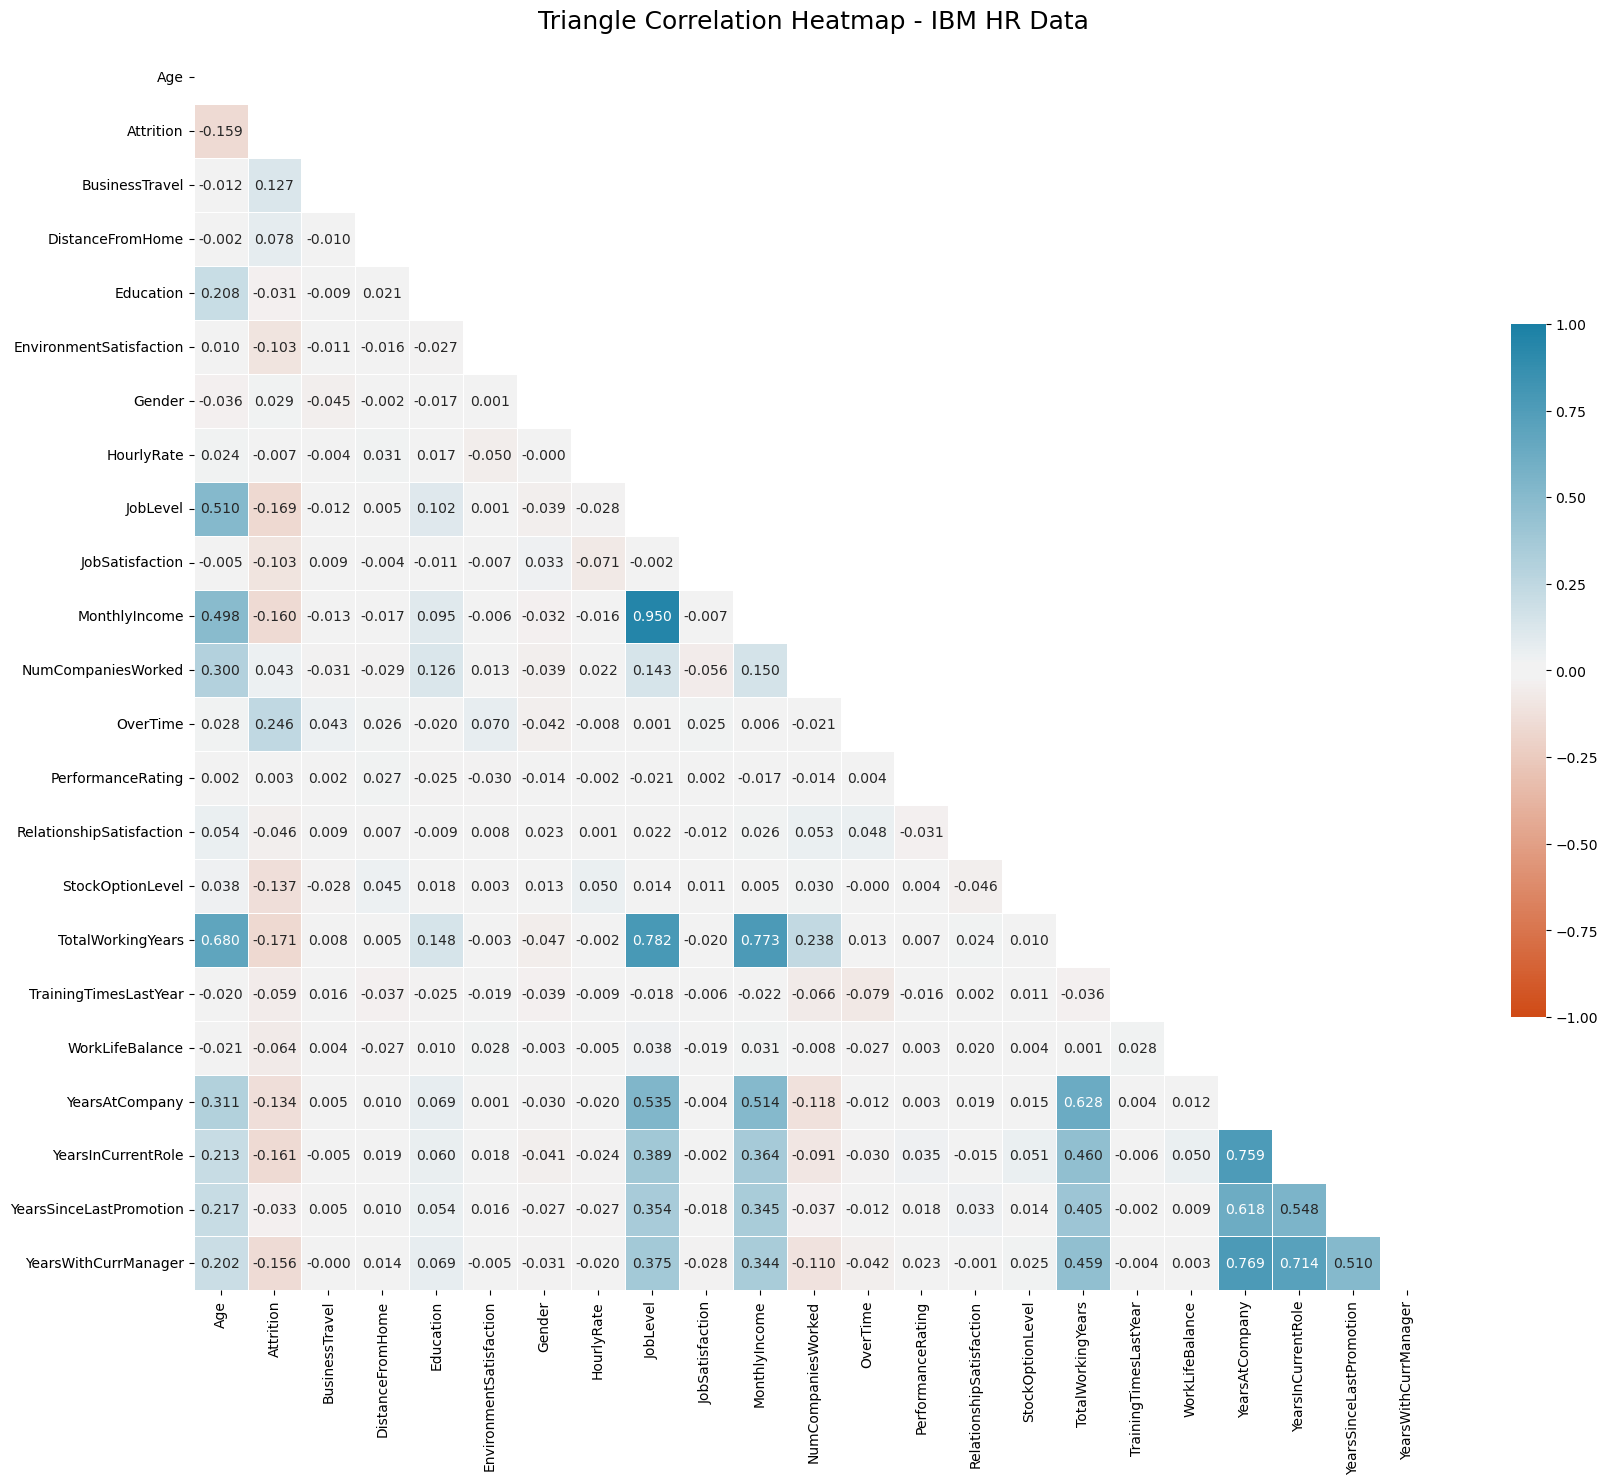

In [185]:


# Compute the correlation matrix
corr = df_ibm_hr_cat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, sep=7, s=95, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap_tri = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

heatmap_tri.set_title('Triangle Correlation Heatmap - IBM HR Data', fontdict={'fontsize':18}, pad=16);

<h2>Does anything interesting come out here?</h2>
<p>It sure does! Here are some items of note:</p>
<li>All the general correlations between age and total working years, and other representations of total working years, as well as income</li>
<li>Employees who are authorized to work overtime rated higher <code>EnvironmentSatisfaction</code> scores</li>
<li>Employees who worked at more companies before this rated lower <code>JobSatisfaction</code> scores</li>
<li>Employees who had more trainings last year worked at fewer companies before this</li>
<li>Employees who had more trainings last year also were more likely to be authorized to work overtime</li>
<li>Employees who had attained higher education levels worked at more companies, but also worked here longer</li>

<h2>Let's look right at our attrition data</h2>
<p>The moment we've all been waiting for. Understanding our employees more completely is great, but right now we are very interested in understanding what factors lead to employee attrition.</p>

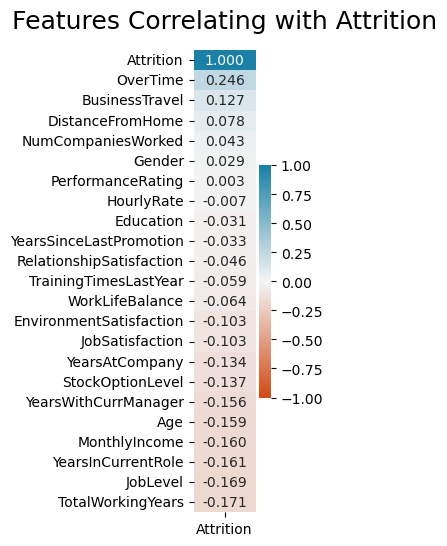

In [17]:
df_ibm_hr_cat.corr()[['Attrition']].sort_values(by='Attrition', ascending=False)

plt.figure(figsize=(1, 6))
heatmap_attrition = sns.heatmap(df_ibm_hr_cat.corr()[['Attrition']].sort_values(by='Attrition', ascending=False), vmin=-1, vmax=1, annot=True, fmt='.3f', cmap=cmap)
heatmap_attrition.set_title('Features Correlating with Attrition', fontdict={'fontsize':18}, pad=16);

<h2>Very interesting data here</h2>
<p>My first note is that nothing is outwardly strong in correlation with <code>Attrition</code>. This might discourage some but what I have found through other research is that if we know this, and we know our attrition rates for different groups of employees, say attrition rates of men and women, that if they show a significant gap to each other that we can still find these otherwise "weak" correlations as somewhat telling. What a weak correlation tends to mean in this case is that, those attrition rates may be close, maybe within a few percentage points, but we could still want to pay attention to those factors. All we have to do is reframe what we call "weak" and "strong" correlations to our results - so if our strongest correlation is 0.30, then that is now our "strong" correlation. I have found previously that my cutoff tends to be 0.05 for a relationship worthy of noting.</p>
<p>My second note is that it seems odd that <code>OverTime</code> is positively correlated with <code>Attrition</code>. When I think of something positive, I usually think of something being "good". That is until I remember that our context for <code>Attrition</code> is that "Yes", leaving the company, is represented by 1. In this case a 1 for an employee being authorized to work overtime correlate to 1 for "Yes". So what we are seeing is that employee's who are authorized to work overtime are, at some level, leaving the company more often. This is why it important to codify our data in a way that makes sense to us when we are thinking about the data and always ensure that when we are looking at and referencing analysis results that we keep those contexts in mind.</p>
<p>Looking at the rest, it seems like everything makes common sense:</p>
<li>Employees who have to travel for work more often leave more often, to some degree</li>
<li>Employees working further from work leave more often, to some degree</li>
<li>Employees that report high satisfaction in any way stay more often</li>
<li>Employees who attained higher position ranks stay more often</li>
<li>Employees who attained a higher <code>StockOptionLevel</code> stay more often</li>
<li>Employees who have worked at this company longer, have worked longer in general, have worked with their current manager longer, etc. stay more often</li>
<li>Employees who have worked at more companies before this are weakly associated with leaving. We might want to look into that further, maybe combining that data with some other categories to see if there are any patterns that emerge.</li>
<br>
<p>Interestingly, there was no appreciable change in attrition for employees who had been rated higher or lower in terms of their performance.</p>

<h2>Let's dig into that <code>OverTime</code> data a little further</h2>
<p>We can visualize our data in another way that might make it more clear what we are talking about with correlations.</p>
<p>I will switch to aggregating the data and creating charts in Microsoft Excel as that is a familiar platform for me where I have done this type of research before.</p>

<img src="Images/employee_attrition_by_overtime_auth.png" alt="Employee Attrition Rate by Overtime Authorization" width="500"/>
<p>We can see here a large disparity in both the total number of employees who have been authorized for overtime, as well as a disparity in the proportion of employees authorized or not authorized for overtime who left the company. Let's look just at the attrition rates themselves, which would be the number of employees who left out of the total number of employees - in this case we are separating that by Overtime Authorization.</p>

<img src="Images/attrition_rate_by_overtime_auth.png" alt="Attrition Rate by Overtime Authorization" width="500"/>
<p>Wow! It sure seems as if employees who are authorized to work overtime leave the company at a higher rate, 3 times higher, in fact, than employees who are not. This is a visual representation of our correlation coefficients - and keep in mind that the correlation factor between <code>OverTime</code> and <code>Attrition</code> was only 0.246, a correlation coefficient that is considered "weak" according to statistics literature.</p>
<p>So we can use correlation matrixes/heatmaps to quickly identify groups of employees that we want to investigate further, that we can see some connection between, and then dive into the data from there, using Pivot Tables to quickly manipulate the data into any many different frames of reference.</p>

<h2>Let's dive in further, then.</h2>
<p>We can also see a very weak correlation between <code>OverTime</code> and <code>Gender</code> so let's investigate that further.</p>
<img src="Images/overtime_auth_by_gender.png" alt="Overtime Authorization by Gender" width="700"/>
<p>We don's see much of a difference here between the ratio of men and women who are authorized to work overtime, which is why the correlation coefficient is so weak, only -0.042. But let's see if there is a difference in attrition rates for men and women who have been authorized for overtime.</p>

<img src="Images/attrition_rate_by_overtime_auth_and_gender.png" alt="Attrition Rate by Overtime Authorization and Gender" width="700"/>
<p>Now that is quite interesting, for employees who were not authorized for overtime there is a negligible different in attrition rates. But our men who are authorized for overtime leave at a considerably higher rate than our women who are authorized to work overtime, by 8 percentage points!</p>

<h1>Conclusions</h1>
<p>This came to be an interesting analysis. We found that there is a disparity in attrition rates between our company's employee's who are authorized to work overtime, and especilly a disparity in those employees based on their gender. This would warrant some further research into the experiences of men and women who are authorized to work overtime to find any reasons for that.</p>
<p>That is one area that this research lacks is that it only sees relationships, but not necessarily causal relationships. Someone may need to add more questions to an employee exit interview to investigate this further to determine a reason for this disparity we found.</p>
<p>In the future it is possible to look into every variable and every combination of variables. Of course we will strategically choose which to look further into to save time for ourselves based on some of our preliminary work along the way.</p>

# Appendix
<h3>Codified Data</h3>
<h4>Education</h4>
<li>1 'Below College'</li>
<li>2 'College'</li>
<li>3 'Bachelor'</li>
<li>4 'Master'</li>
<li>5 'Doctor'</li>

<h4>EnvironmentSatisfaction</h4>
<li>1 'Low'</li>
<li>2 'Medium'</li>
<li>3 'High'</li>
<li>4 'Very High'</li>

<h4>JobInvolvement</h4>
<li>1 'Low'</li>
<li>2 'Medium'</li>
<li>3 'High'</li>
<li>4 'Very High'</li>

<h4>JobSatisfaction</h4>
<li>1 'Low'</li>
<li>2 'Medium'</li>
<li>3 'High'</li>
<li>4 'Very High'</li>

<h4>PerformanceRating</h4>
<li>1 'Low'</li>
<li>2 'Good'</li>
<li>3 'Excellent'</li>
<li>4 'Outstanding'</li>

<h4>RelationshipSatisfaction</h4>
<li>1 'Low'</li>
<li>2 'Medium'</li>
<li>3 'High'</li>
<li>4 'Very High'</li>

<h4>WorkLifeBalance</h4>
<li>1 'Bad'</li>
<li>2 'Good'</li>
<li>3 'Better'</li>
<li>4 'Best'</li>